<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/Ago18-19/Copy_of_Prediccion_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargar el archivo Excel desde tu computadora
excel_file_path = '/content/Stock.xlsx'  # Reemplaza esto con la ruta real del archivo Excel
data = pd.read_excel(excel_file_path)

# Extraer los datos de las columnas "Date" y "CloseUSD" en forma de arrays
Date_array = data['Date'].values
CloseUSD_array = data['CloseUSD'].values




np.polyfit() se utiliza para ajustar un polinomio a un conjunto de datos mediante regresión polinómica.
Uso: Toma datos (puntos x, puntos y) y un grado de polinomio como entrada, y devuelve los coeficientes del polinomio que mejor se ajusta a los datos en un sentido de mínimos cuadrados.

np.polyval() se utiliza para evaluar un polinomio en un punto o en un conjunto de puntos.  #[2, 3, 1]  # Coeficientes del polinomio: 2 + 3x + x^2

coef = np.polyfit(date_numeric, CloseUSD_array, i): Calculamos los coeficientes del polinomio de grado i que mejor se ajusta a los datos de fechas numéricas (date_numeric) y valores de cierre del USD (CloseUSD_array). Básicamente, estamos encontrando la ecuación de un polinomio que mejor representa estos datos. En otras palabras un polinomio con nuestros x y
y_pred = fx(date_numeric, coef): Usamos la función fx() que definimos antes para calcular los valores predichos del polinomio (en el eje y) para cada una de las fechas numéricas.

Basicamente calculamos un coeficiente con polyfit, y como ya con eso tenemos un valor especifo, los sustituimos en polyval, el return de polyval seria nuestra prediccion para el valor de Y

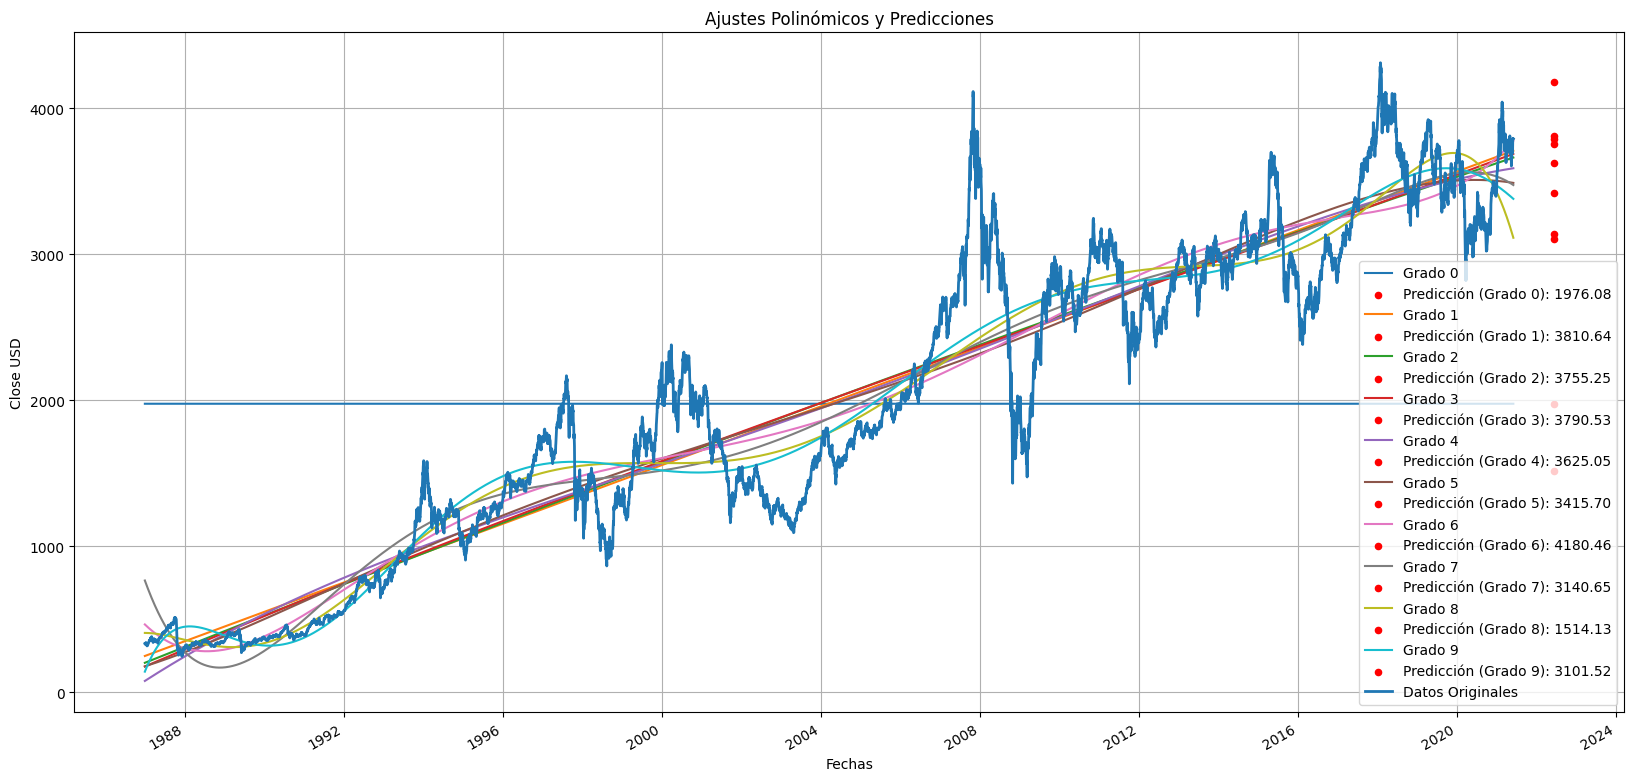

In [9]:
# Función para el ajuste polinómico
def fx(x, coef):
    return np.polyval(coef, x)

# Convertir fechas a objetos datetime y números
date_objects = pd.to_datetime(Date_array)
date_numeric = mdates.date2num(date_objects)

# Grado máximo para el ajuste polinómico
max_degree = 9

plt.figure(figsize=[20, 10])
plt.title("Ajustes Polinómicos y Predicciones")

for i in range(max_degree + 1):
    coef = np.polyfit(date_numeric, CloseUSD_array, i)
    y_pred = fx(date_numeric, coef)

    plt.plot(date_objects, y_pred, label=f'Grado {i}')

    # Realizar la predicción para una fecha específica
    prediction_date = pd.to_datetime('2022-06-08')
    prediction_value = np.polyval(coef, mdates.date2num(prediction_date))

    plt.scatter(prediction_date, prediction_value, s=20, color='red', label=f'Predicción (Grado {i}): {prediction_value:.2f}')

plt.plot(date_objects, CloseUSD_array, label='Datos Originales', linewidth=2)
plt.grid(True)
plt.xlabel("Fechas")
plt.ylabel("Close USD")
plt.legend()
plt.gcf().autofmt_xdate()  # Rotar automáticamente las fechas para una mejor visualización
plt.show()


In [ ]:
En este caso solo repeti la funcion multiples veces cambiando el valor de degree y la funcion

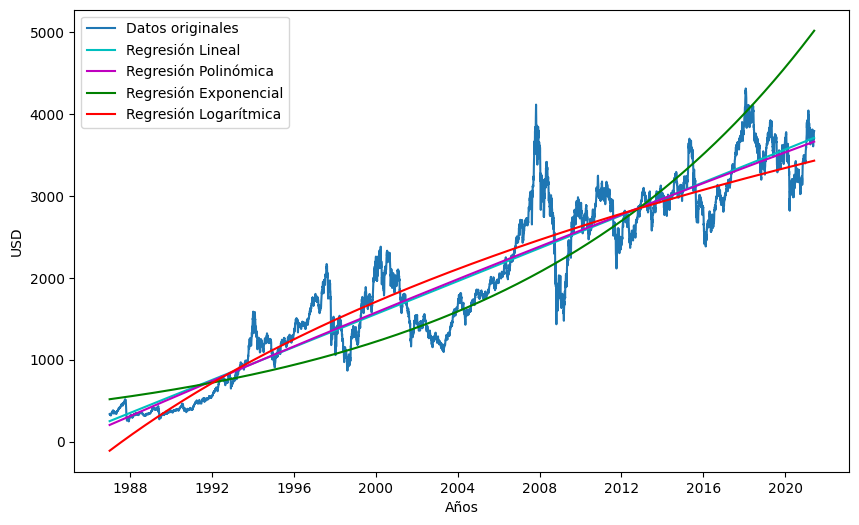

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def w_mat(x, y):
    X = np.vstack((np.ones_like(x), x)).T
    t = y
    XX = np.matmul(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.matmul(X.T, t)
    w = np.matmul(invXX, Xt)
    return w

def polynomial_regression(x, degree, y):
    X = np.vstack([x ** i for i in range(degree + 1)]).T
    t = y
    XX = np.matmul(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.matmul(X.T, t)
    w = np.matmul(invXX, Xt)
    return w

def exponential_regression(x, y):
    X = np.vstack((np.ones_like(x), x)).T
    t = np.log(y)
    XX = np.matmul(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.matmul(X.T, t)
    w = np.matmul(invXX, Xt)
    w[0] = np.exp(w[0])
    return w

def logarithmic_regression(x, y):
    X = np.vstack((np.ones_like(x), np.log(x))).T
    t = y
    XX = np.matmul(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.matmul(X.T, t)
    w = np.matmul(invXX, Xt)
    return w

# Cargar el archivo Excel desde tu computadora
excel_file_path = '/content/Stock.xlsx'  # Reemplaza esto con la ruta real del archivo Excel
data = pd.read_excel(excel_file_path)

# Extraer los datos de las columnas "Date" y "CloseUSD" en forma de arrays
Date_array = data['Date'].values
CloseUSD_array = data['CloseUSD'].values

# Convertir fechas a objetos datetime y números
date_objects = pd.to_datetime(Date_array)
date_numeric = mdates.date2num(date_objects)

# Regresión Lineal
w_linear = w_mat(date_numeric, CloseUSD_array)
sub_predict_linear = w_linear[0] + w_linear[1] * date_numeric

# Regresión Polinómica
degree = 2  # Cambia el grado del polinomio si es necesario
w_poly = polynomial_regression(date_numeric, degree, CloseUSD_array)
sub_predict_poly = np.polyval(w_poly[::-1], date_numeric)  # Evaluate the polynomial

# Regresión Exponencial
w_exp = exponential_regression(date_numeric, CloseUSD_array)
sub_predict_exp = w_exp[0] * np.exp(w_exp[1] * date_numeric)

# Regresión Logarítmica
w_log = logarithmic_regression(date_numeric, CloseUSD_array)
sub_predict_log = w_log[0] + w_log[1] * np.log(date_numeric)

# Graficar los resultados
plt.figure(figsize=(10, 6))

plt.plot(date_objects, CloseUSD_array, label='Datos originales')
plt.plot(date_objects, sub_predict_linear, 'c', label='Regresión Lineal')
plt.plot(date_objects, sub_predict_poly, 'm', label='Regresión Polinómica')
plt.plot(date_objects, sub_predict_exp, 'g', label='Regresión Exponencial')
plt.plot(date_objects, sub_predict_log, 'r', label='Regresión Logarítmica')

plt.xlabel('Años')
plt.ylabel('USD')
plt.legend()
plt.show()

